In [1]:
import _pickle as pickle
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from keras import optimizers
from sklearn.model_selection import train_test_split
import spotify
from keras.models import load_model,save_model,model_from_yaml
from keras import backend as K

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
CLASSES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [3]:
with open('geners.pickle','rb') as f:
    X, y = pickle.load(f)
print (X.shape)
print (y.shape)

(1000, 647, 128)
(1000, 10)


In [4]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
def plot_spectogram(x, tag=None):
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(x.T, y_axis='mel', x_axis='time')
    if tag:
        plt.title('Melspectogram for ' + g + '[0]')
        plt.tight_layout()

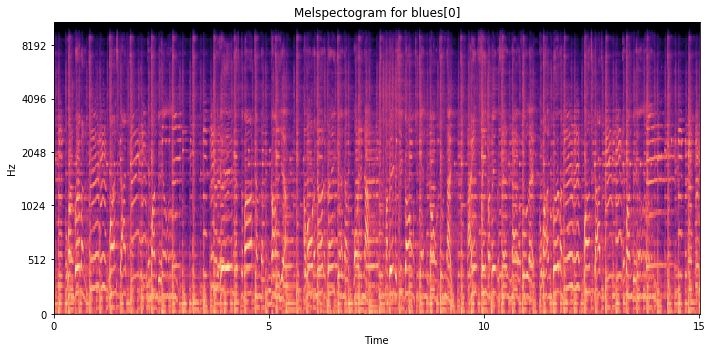

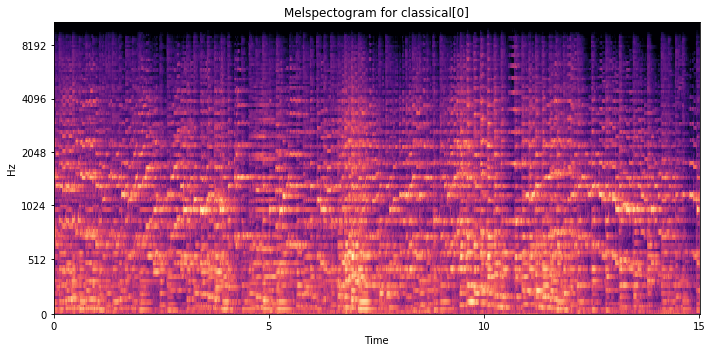

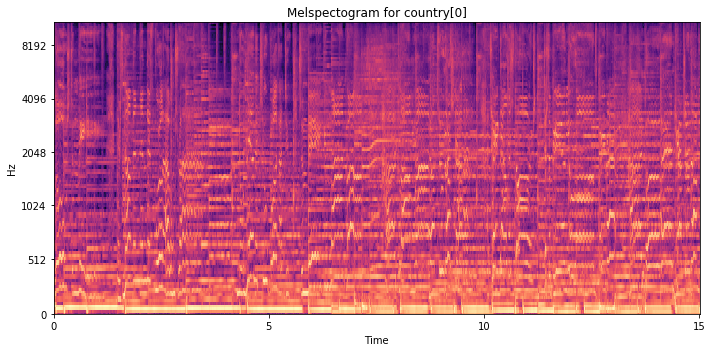

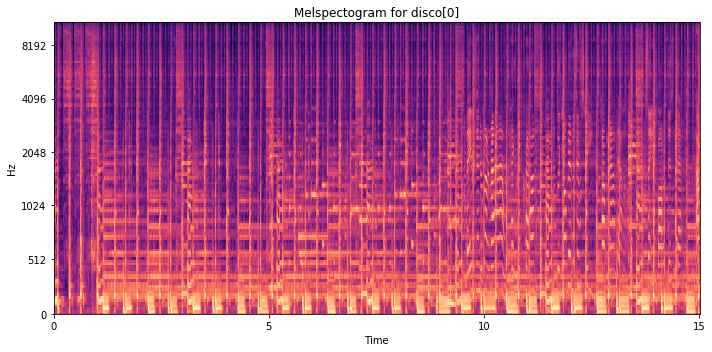

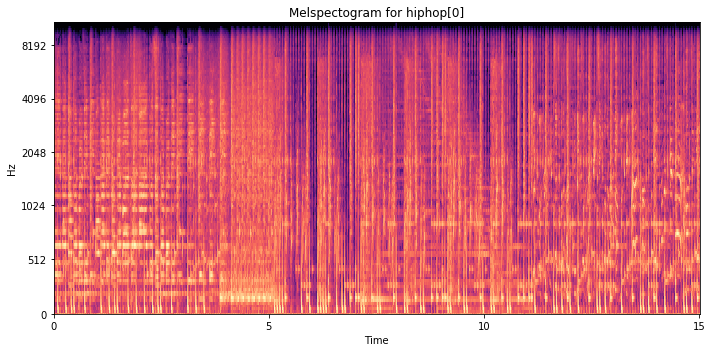

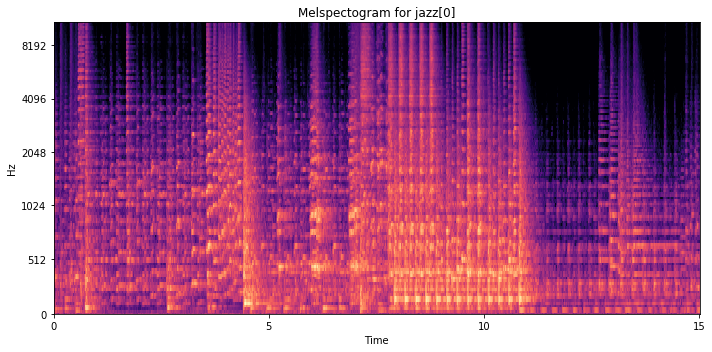

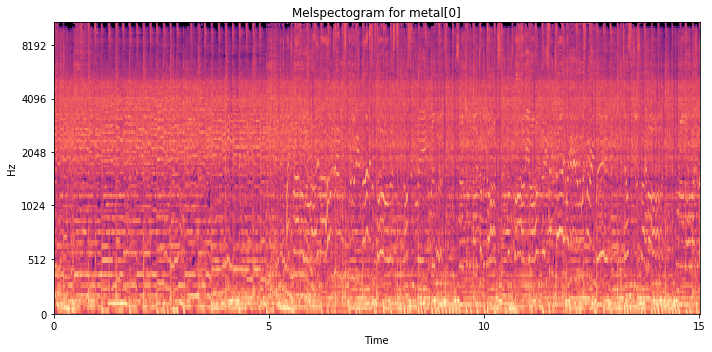

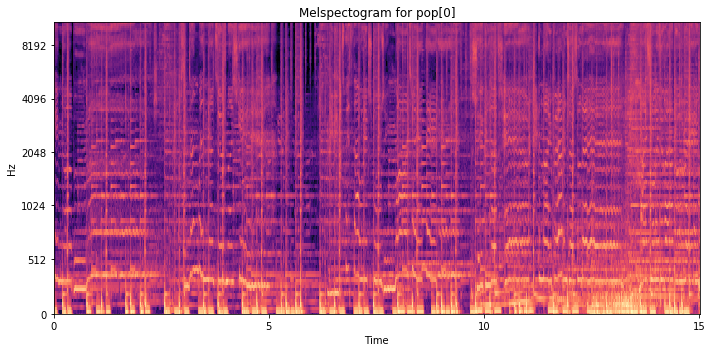

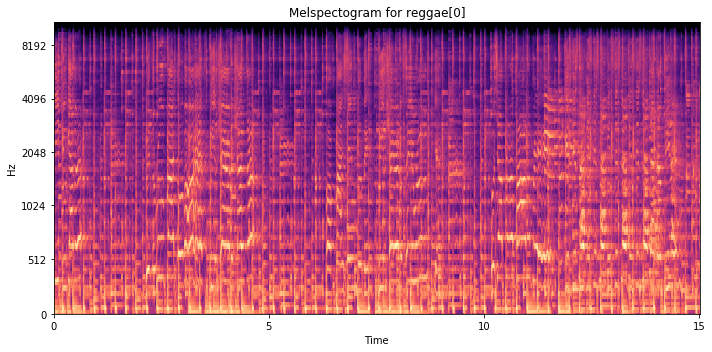

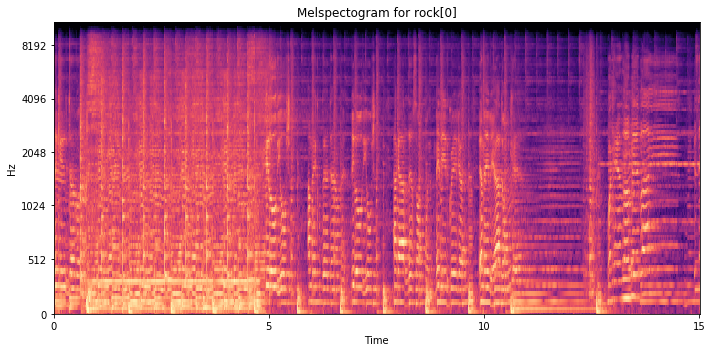

In [5]:
for i,g in enumerate(CLASSES):
    plot_spectogram(X[i*100,:,:], tag=g)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [7]:
mean_spectogram = np.mean(X_train, axis=0)
std_spectogram = np.std(X_train, axis=0)
X_val = (X_val - mean_spectogram) / std_spectogram
X_train = (X_train - mean_spectogram) / std_spectogram

In [8]:
model = spotify.get(X_train[0].shape, len(CLASSES))
optimizer = optimizers.adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [10]:
initial_model = model.fit(X_train, y_train, batch_size=32, epochs = 1,
              validation_data=(X_val, y_val))

Train on 670 samples, validate on 330 samples
Epoch 1/1
670/670 [==============================] - 8s 11ms/step - loss: 2.0810 - acc: 0.2433 - val_loss: 2.0232 - val_acc: 0.3152


In [11]:
with open('trainedModel.yaml' , 'rb') as f:
    trained_model = model_from_yaml(f.read())
trained_model.load_weights('model_weights.h5')
optimizer = optimizers.adam(lr=0.001)
trained_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [12]:
trained_model.fit(X_train, y_train, batch_size=32, epochs = 1,
             validation_data=(X_val, y_val))

Train on 670 samples, validate on 330 samples
Epoch 1/1
670/670 [==============================] - 8s 12ms/step - loss: 0.8680 - acc: 0.6075 - val_loss: 5.3126 - val_acc: 0.4455


In [13]:
input_layer = trained_model.inputs
output_layer = trained_model.outputs

In [14]:
def get_function(input,output):
    f = K.function(input, output)
    return lambda x : f([x])
output_fn = get_function(input_layer,output_layer)
features = X_train[50]
features = features.reshape((1,)+(647,128))
feature_name = y_train[50]

print (np.argmax(feature_name),np.argmax(output_fn(features)))

2 2
